# Cap8 - Off lattice Monte Carlo of Hard Spheres

#### Marco Zenari

In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os #to read file names
import re #regular expression to infer parameters from filenames

## Hard spheres

In [2]:
#Creating a list with the names of the files
path='OLMC_code_hard_spheres/output/'
filenames = os.listdir(path)
filenames = sorted(filenames,) #ordering the filenames

In [3]:
filenames[:5]

['Hard_spheres_ic_cubic_lattice_N_100_density_0.050000_time_30000_displacement_0.010000_realization_0.txt',
 'Hard_spheres_ic_cubic_lattice_N_100_density_0.050000_time_30000_displacement_0.010000_realization_1.txt',
 'Hard_spheres_ic_cubic_lattice_N_100_density_0.050000_time_30000_displacement_0.010000_realization_2.txt',
 'Hard_spheres_ic_cubic_lattice_N_100_density_0.050000_time_30000_displacement_0.010000_realization_3.txt',
 'Hard_spheres_ic_cubic_lattice_N_100_density_0.050000_time_30000_displacement_0.010000_realization_4.txt']

In [4]:
## Data frame to save summary of simulations
col =['initialization', 'N', 'density', 'time', 'max_displacement',
      'realization', 'energy', 'acceptance_ratio']
df_simul=pd.DataFrame(columns= col)

In [5]:
t_eq = 5000 #tempo di equilibrazione

In [6]:
#analysis file per file
for i, file in enumerate(filenames):
    #choosing the file to analyze and loading the data
    data = np.loadtxt(fname=path+file)
    
    #extract parameters of the simulation with regex
    pattern_initialization = r'ic_(.*?)_'
    initialization = re.search(pattern_initialization, file).group(1)
    
    pattern_N = r'N_(.*?)_'
    N = int(re.search(pattern_N, file).group(1))
    
    pattern_density = r'density_(.*?)_'
    rho = float(re.search(pattern_density, file).group(1))
       
    pattern_time = r'time_(.*?)_'
    time = int(re.search(pattern_time, file).group(1))
    
    pattern_displacement = r'displacement_(.*?)_'
    d_max = float(re.search(pattern_displacement, file).group(1))
    
    pattern_realization = r'realization_(.*?).txt'
    n = int(re.search(pattern_realization, file).group(1))
    
    av_energy = np.mean(data[t_eq:, 1])
    av_acc_rate = np.mean(data[t_eq:, 2])
    
    #saving parameters and result in a dataframe
    df_simul.loc[len(df_simul)] = [initialization, N, rho, time, d_max,
                                   n, av_energy, av_acc_rate] 

In [7]:
df_simul.head()

initialization    N  density   time  max_displacement  realization  \
0          cubic  100     0.05  30000              0.01            0   
1          cubic  100     0.05  30000              0.01            1   
2          cubic  100     0.05  30000              0.01            2   
3          cubic  100     0.05  30000              0.01            3   
4          cubic  100     0.05  30000              0.01            4   

     energy  acceptance_ratio  
0  58.94788          0.982371  
1  57.46440          0.979275  
2  58.65168          0.980484  
3  52.64240          0.974928  
4  53.53080          0.976960

In [8]:
# Random initialization
random_df = df_simul[df_simul['initialization']=='random']
d_max = random_df['max_displacement'].unique()
density = random_df['density'].unique()

In [9]:
series = random_df.groupby(['density', 'max_displacement'])['energy'].mean()

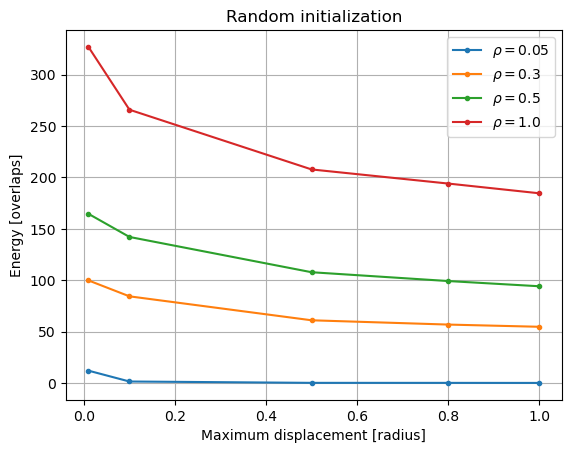

In [11]:
for i in range(len(density)):
    energy = []
    for j in range(len(d_max)):
        energy.append(series.iloc[i*len(d_max)+j])
    
    plt.plot(d_max, np.array(energy), '.-',label= r'$\rho={}$'.format(density[i]))
    plt.legend()
    plt.xlabel('Maximum displacement [radius]')
    plt.ylabel('Energy [overlaps]')

plt.title('Random initialization')
plt.grid()   
plt.savefig('plots/random_init_energy_overlaps')

In [12]:
series = random_df.groupby(['density', 'max_displacement'])['acceptance_ratio'].mean()

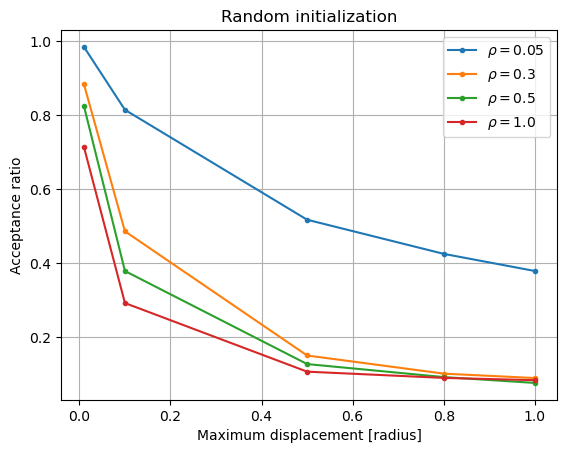

In [14]:
for i in range(len(density)):
    acc_ratio = []
    for j in range(len(d_max)):
        acc_ratio.append(series.iloc[i*len(d_max)+j])
    
    plt.plot(d_max, np.array(acc_ratio), '.-', label= r'$\rho={}$'.format(density[i]))
    plt.legend()
    plt.xlabel('Maximum displacement [radius]')
    plt.ylabel('Acceptance ratio')

plt.title('Random initialization')
plt.grid()
plt.savefig('plots/random_init_acceptance_ratio')

In [15]:
# Cubic lattice initialization
cubic_df = df_simul[df_simul['initialization']=='cubic']
d_max = random_df['max_displacement'].unique()
density = random_df['density'].unique()

In [16]:
series = cubic_df.groupby(['density', 'max_displacement'])['energy'].mean()

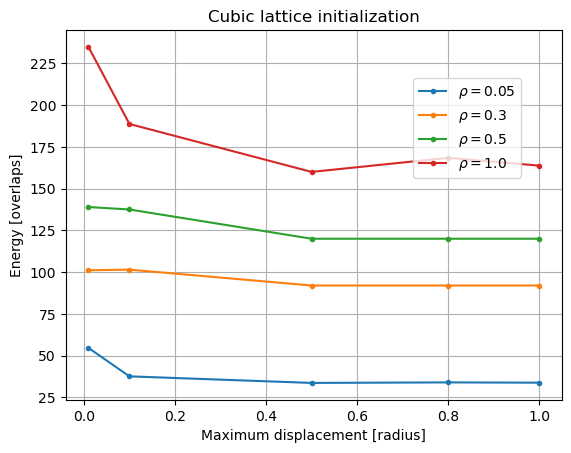

In [18]:
for i in range(len(density)):
    energy = []
    for j in range(len(d_max)):
        energy.append(series.iloc[i*len(d_max)+j])
    
    plt.plot(d_max, np.array(energy), '.-', label= r'$\rho={}$'.format(density[i]))

    plt.xlabel('Maximum displacement [radius]')
    plt.ylabel('Energy [overlaps]')

    
plt.legend(loc = (0.7, 0.6))
plt.title('Cubic lattice initialization')
plt.grid()  
plt.savefig('plots/cubic_init_energy_overlaps')

In [19]:
series = cubic_df.groupby(['density', 'max_displacement'])['acceptance_ratio'].mean()

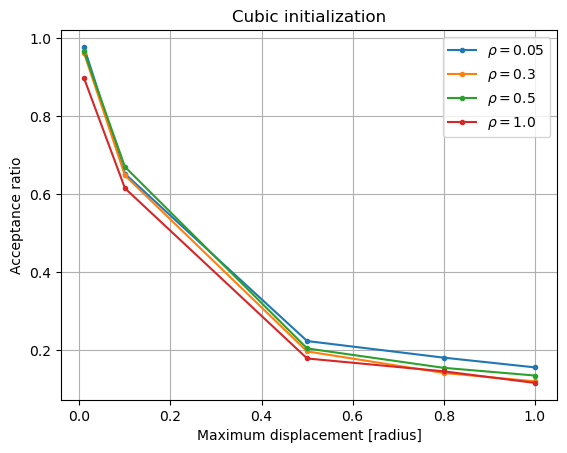

In [21]:
for i in range(len(density)):
    acc_ratio = []
    for j in range(len(d_max)):
        acc_ratio.append(series.iloc[i*len(d_max)+j])
    
    plt.plot(d_max, np.array(acc_ratio), '.-', label= r'$\rho={}$'.format(density[i]))
    plt.legend()
    plt.xlabel('Maximum displacement [radius]')
    plt.ylabel('Acceptance ratio')

plt.title('Cubic initialization')
plt.grid()   
plt.savefig('plots/cubic_init_acceptance_ration')